***Adventure Works Cycles***

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as asc



C:\Users\Amit\Anaconda3\envs\Python 2.7\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#load data
customers = pd.read_csv('AWCustomers.csv')
sales = pd.read_csv('AWSales.csv')


In [7]:
#drop duplicates
customers= customers.drop_duplicates(subset = ['CustomerID'])

print customers.dtypes
print sales.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
LastUpdated             object
dtype: object
CustomerID         int64
BikeBuyer          int64
AvgMonthSpend    float64
dtype: object


In [8]:
#YearlyIncome By Occupation
print customers.YearlyIncome.groupby(customers.Occupation).median()

# calculate age
customers.BirthDate = pd.to_datetime(customers.BirthDate, errors = 'coerce')
customers['age'] = 2017 - customers['BirthDate'].dt.year


Occupation
Clerical           81964
Management        107633
Manual             31151
Professional      133057
Skilled Manual     56547
Name: YearlyIncome, dtype: int64


In [9]:
# Join both tables
df = pd.DataFrame.merge(customers,sales,how='left',on='CustomerID')


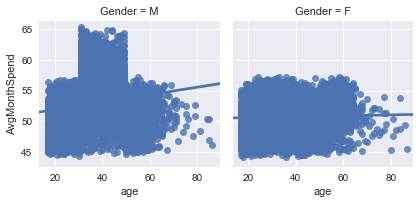

In [15]:
#High AvgMonthlySpend by gender and age
g =sns.FacetGrid(df,col='Gender')
g.map(sns.regplot,'age','AvgMonthSpend')
plt.show()

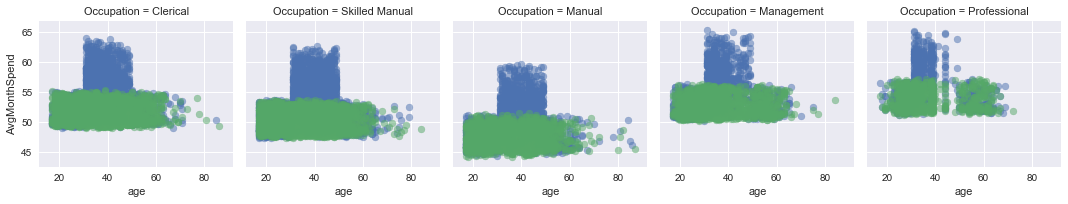

In [23]:
#AvgMonthlySpend by Occupation and age
g =sns.FacetGrid(df,col='Occupation', hue="Gender")
g.map(plt.scatter,'age','AvgMonthSpend',alpha=0.5)
plt.show()

In [24]:
#Values by group 
print df.AvgMonthSpend.groupby(df.MaritalStatus).median()
print df.AvgMonthSpend.groupby(df.NumberCarsOwned).median()
print df.AvgMonthSpend.groupby(df.Gender).mean()
print df.AvgMonthSpend.groupby(df.NumberChildrenAtHome).median()


print df.YearlyIncome.groupby(df.BikeBuyer).median()
print df.BikeBuyer.groupby(df.MaritalStatus).mean()
print df.BikeBuyer.groupby(df.Gender).mean()
print df.BikeBuyer[df.BikeBuyer == 1].groupby(df.Occupation).count()
print df.NumberCarsOwned.groupby(df.BikeBuyer).median()


MaritalStatus
M    51.15
S    51.78
Name: AvgMonthSpend, dtype: float64
NumberCarsOwned
0    50.25
1    50.77
2    52.17
3    52.64
4    54.72
5    55.51
Name: AvgMonthSpend, dtype: float64
Gender
F    50.686480
M    52.822909
Name: AvgMonthSpend, dtype: float64
NumberChildrenAtHome
0    51.100
1    52.180
2    52.455
3    52.320
Name: AvgMonthSpend, dtype: float64
BikeBuyer
0    57781
1    79484
Name: YearlyIncome, dtype: int64
MaritalStatus
M    0.638311
S    0.449346
Name: BikeBuyer, dtype: float64
Gender
F    0.493275
M    0.608831
Name: BikeBuyer, dtype: float64
Occupation
Clerical          2849
Management        1913
Manual             886
Professional      1093
Skilled Manual    3386
Name: BikeBuyer, dtype: int64
BikeBuyer
0    1
1    2
Name: NumberCarsOwned, dtype: int64


In [34]:

# import test data
df_test = pd.read_csv('AWTest-Classification.csv')
# decision tree
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth = 20,min_samples_split = 10,max_features = 5)
X = df.iloc[:,[14,15,16,17,18,19,20,21,22,24]]

order_Education = ['Partial High School','High School','Partial College','Bachelors','Graduate Degree']
X.loc[:,'Education'] = X.loc[:,'Education'].astype("category",ordered=True,categories=order_Education).cat.codes

order_occupation = ['Manual','Skilled Manual','Clerical','Management','Professional']
X.loc[:,'Occupation'] = X.loc[:,'Occupation'].astype("category",ordered=True,categories=order_occupation).cat.codes

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X.loc[:,'Gender'] = le.fit_transform(X.Gender)
X.loc[:,'MaritalStatus'] = le.fit_transform(X.MaritalStatus)            
                  
y = df.iloc[:,25]
clf = clf.fit(X,y)
print asc(y,clf.predict(X))


0.870934350313


In [37]:
#Predict test data
df_test.BirthDate = pd.to_datetime(df_test.BirthDate, errors = 'coerce')
df_test['age'] = 2017 - df_test['BirthDate'].dt.year
X_test = df_test.iloc[:,[14,15,16,17,18,19,20,21,22,24]]

X_test.loc[:,'Education'] = X_test.loc[:,'Education'].astype("category",ordered=True,categories=order_Education).cat.codes

X_test.loc[:,'Occupation'] = X_test.loc[:,'Occupation'].astype("category",ordered=True,categories=order_occupation).cat.codes

X_test.loc[:,'Gender'] = le.fit_transform(X_test.Gender)
X_test.loc[:,'MaritalStatus'] = le.fit_transform(X_test.MaritalStatus)            

X_test = X_test.fillna(X.mean())

my_prediction = clf.predict(X_test)
CustomerId =np.array(df_test["CustomerID"]).astype(int)
dTree_solution = pd.DataFrame(my_prediction, CustomerId, columns = ["BikeBuyer"])
print dTree_solution

       BikeBuyer
11219          1
11241          0
11352          1
11904          1
11908          1
12113          1
12221          0
12286          1
12292          0
12305          1
12807          0
12820          0
12892          0
13310          1
13349          1
13482          1
13640          1
13838          0
14320          1
14327          0
14380          1
14477          1
14564          0
14652          1
14698          0
14778          0
15085          1
15177          1
15388          1
15464          1
15573          1
15626          1
15727          1
15738          1
15866          0
15875          1
16184          1
16394          0
16575          1
17536          1
17605          1
17723          0
17726          0
18171          0
18345          1
18382          0
18842          1
18956          0
19019          1
19315          1


In [40]:
# Classification by Random Forest

from sklearn.ensemble import RandomForestClassifier as rfc
model = rfc(n_estimators = 100,max_depth =20 ,min_samples_split=10)
model.fit(X,y)
print asc(y,model.predict(X))

rfc_prediction = model.predict(X_test)
rfc_solution = pd.DataFrame(rfc_prediction, CustomerId, columns = ["BikeBuyer"])
print rfc_solution


0.895505311904
       BikeBuyer
11219          1
11241          0
11352          1
11904          1
11908          1
12113          1
12221          0
12286          1
12292          0
12305          1
12807          0
12820          0
12892          1
13310          1
13349          1
13482          1
13640          1
13838          1
14320          1
14327          0
14380          1
14477          0
14564          0
14652          1
14698          1
14778          0
15085          1
15177          1
15388          1
15464          1
15573          0
15626          1
15727          1
15738          1
15866          0
15875          1
16184          1
16394          0
16575          1
17536          1
17605          1
17723          1
17726          0
18171          0
18345          1
18382          0
18842          1
18956          0
19019          1
19315          1


In [49]:
#Reggresion
df_test = pd.read_csv('AWTest-Regression.csv')
from sklearn import linear_model
LRmodel = linear_model.LinearRegression()

X = df.iloc[:,[14,15,16,17,18,19,20,21,22,24]]


order_Education = ['Partial High School','High School','Partial College','Bachelors','Graduate Degree']
X.loc[:,'Education'] = X.loc[:,'Education'].astype("category",ordered=True,categories=order_Education).cat.codes

order_occupation = ['Manual','Skilled Manual','Clerical','Management','Professional']
X.loc[:,'Occupation'] = X.loc[:,'Occupation'].astype("category",ordered=True,categories=order_occupation).cat.codes

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X.loc[:,'Gender'] = le.fit_transform(X.Gender)
X.loc[:,'MaritalStatus'] = le.fit_transform(X.MaritalStatus)            

y = df.iloc[:,26]

LRmodel.fit(X,y)

print LRmodel.score(X,y)

#Predict test data
df_test.BirthDate = pd.to_datetime(df_test.BirthDate, errors = 'coerce')
df_test['age'] = 2017 - df_test['BirthDate'].dt.year
X_test = df_test.iloc[:,[14,15,16,17,18,19,20,21,22,24]]

order_Education = ['Partial High School','High School','Partial College','Bachelors','Graduate Degree']
X_test.loc[:,'Education'] = X_test.loc[:,'Education'].astype("category",ordered=True,categories=order_Education).cat.codes

order_occupation = ['Manual','Skilled Manual','Clerical','Management','Professional']
X_test.loc[:,'Occupation'] = X_test.loc[:,'Occupation'].astype("category",ordered=True,categories=order_occupation).cat.codes

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_test.loc[:,'Gender'] = le.fit_transform(X_test.Gender)
X_test.loc[:,'MaritalStatus'] = le.fit_transform(X_test.MaritalStatus)            

X_test = X_test.fillna(X.mean())

reg_prediction = LRmodel.predict(X_test)
CustomerId =np.array(df_test["CustomerID"]).astype(int)
reg_solution = pd.DataFrame(reg_prediction, CustomerId, columns = ["AvgMonthSpend"])
print reg_solution


0.455132353256
       AvgMonthSpend
11908      57.335456
12286      57.497714
12892      55.410323
14698      51.645587
15085      54.521183
15727      53.347245
17418      53.455345
17723      54.227995
18644      53.472805
19218      52.457364
20671      56.693327
20697      52.975959
20734      54.106145
20812      53.066864
23244      55.212854
23454      53.061596
24420      55.517967
25193      52.359047
25793      51.506666
26410      52.979924
26694      50.749212
28096      50.622338
28676      55.566782
29015      54.055279
29377      53.057440
